<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema1_OECD_API_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para importar datos de crecimiento del PIB de la OECD y crear gráficos para cada país

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
plt.style.use('seaborn-v0_8')

In [ ]:
# Read data from OCED API (https://quant-trading.co/how-to-download-data-oecd-database/)

# First, make a query in https://data-explorer.oecd.org/ "real gdp growth"
# Click on API amd copy url
# Click Labels => "Both" to know the meaning of each identifier (code). We look at the "Table" layout. This way, we know that are interested in:
  # (COMBINED_TRANSACTION) Combined transaction:(B1GQ, S1) Gross domestic product, Total economy
  # (COMBINED_UNIT_MEASURE) Combined unit of measure:(G1, L, Y) Growth rate, period on period, Chain linked volume, Calendar and seasonally adjusted
# Edit URL

url="https://sdmx.oecd.org/public/rest/data/OECD.SDD.NAD,DSD_NAMAIN1@DF_QNA_EXPENDITURE_GROWTH_OECD,1.1/Q..CHN+FRA+DEU+ITA+GBR+USA+ESP..........?startPeriod=1960-Q1"

headers = { 'Accept':  'application/vnd.sdmx.data+csv; charset=utf-8' }
download = requests.get(url = url,headers = headers)
df = pd.read_csv(io.StringIO(download.text))
df

,DATAFLOW,FREQ,ADJUSTMENT,REF_AREA,SECTOR,COUNTERPART_SECTOR,TRANSACTION,INSTR_ASSET,ACTIVITY,EXPENDITURE,...,TABLE_IDENTIFIER,TIME_PERIOD,OBS_VALUE,REF_YEAR_PRICE,BASE_PER,CONF_STATUS,DECIMALS,OBS_STATUS,UNIT_MULT,CURRENCY
0,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,P6,_Z,_Z,_Z,...,T0102,1996-Q1,-1.853186,NaN,NaN,F,1,A,0,_Z
1,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,P6,_Z,_Z,_Z,...,T0102,1996-Q2,-0.128486,NaN,NaN,F,1,A,0,_Z
2,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,P6,_Z,_Z,_Z,...,T0102,1996-Q3,-0.270458,NaN,NaN,F,1,A,0,_Z
3,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,P6,_Z,_Z,_Z,...,T0102,1996-Q4,1.624971,NaN,NaN,F,1,A,0,_Z
4,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,P6,_Z,_Z,_Z,...,T0102,1997-Q1,0.891423,NaN,NaN,F,1,A,0,_Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19719,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,B1GQ,_Z,_Z,_Z,...,T0102,2024-Q4,6.022293,2019-Q4,2019-Q4,F,1,A,0,_Z
19720,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,ITA,S1,S1,B1GQ,_Z,_Z,_Z,...,T0102,2025-Q1,6.352360,2019-Q4,2019-Q4,F,1,A,0,_Z
19721,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,FRA,S1,S1,B1GQ,_Z,_Z,_Z,...,T0102,2025-Q1,4.774555,2019-Q4,2019-Q4,F,1,A,0,_Z
19722,OECD.SDD.NAD:DSD_NAMAIN1@DF_QNA_EXPENDITURE_GR...,Q,Y,FRA,S1,S1,B1GQ,_Z,_Z,_Z,...,T0102,2025-Q2,5.125854,2019-Q4,2019-Q4,F,1,A,0,_Z


/tmp/ipython-input-1446934784.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['TIME_PERIOD'] = pd.to_datetime(df2['TIME_PERIOD'])


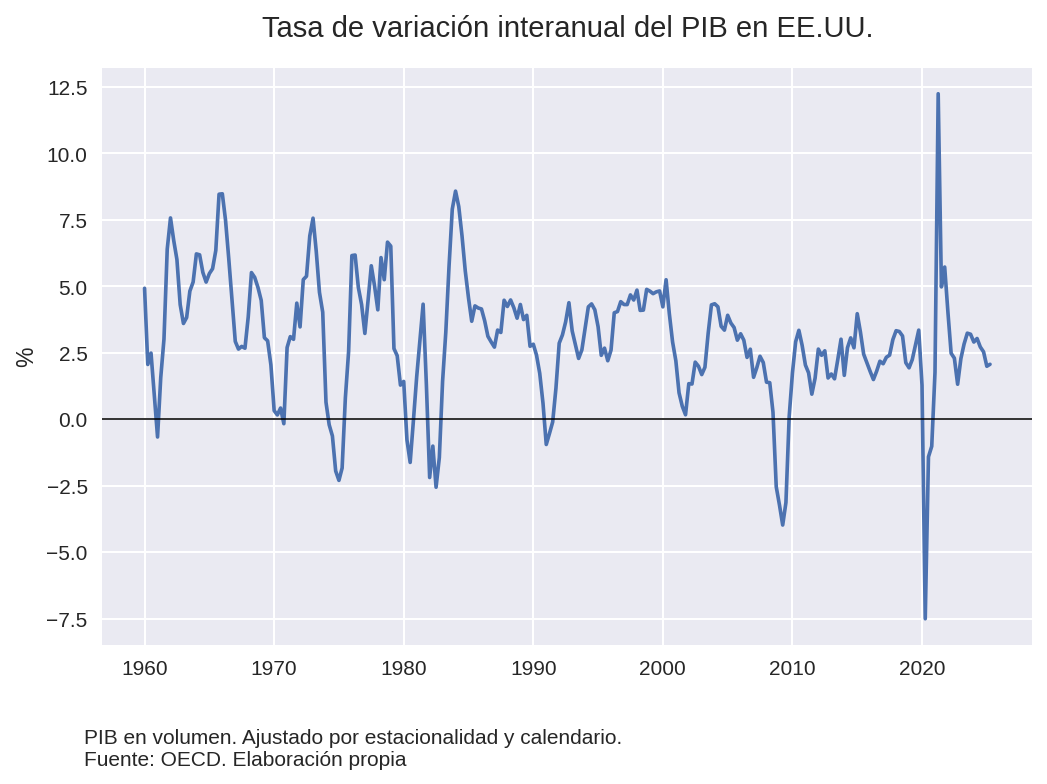

In [ ]:
dict_paises={"CHN":"China","FRA":"Francia","DEU":"Alemania","ITA":"Italia","GBR":"Reino Unido","USA":"EE.UU.","ESP":"España"}

country="USA"
indicator="B1GQ"
sector="S1"
transf="GY"   # "G1" period on period // "GY"  over 1 year,
df2=df.loc[(df['REF_AREA']==country) & (df['TRANSACTION']==indicator)  & (df['SECTOR']==sector) & (df['TRANSFORMATION']==transf)].copy()
df2['TIME_PERIOD'] = pd.to_datetime(df2['TIME_PERIOD'])
df2.set_index('TIME_PERIOD', inplace=True)
df2.sort_index(inplace=True)

fig, ax=plt.subplots(figsize=(8,5),dpi=150)
ax.plot(df2['OBS_VALUE'])
ax.set_ylabel("%") # Nombre del eje y
ax.set_xlabel("") # Nombre del eje x
ax.axhline(y=0, linewidth=0.75, color="black") # Añado una línea horizonal para resaltar el valor de 0.
ax.set_title(f"Tasa de variación interanual del PIB en {dict_paises[country]}", size=14, pad=15) # Título del gráfico
fig.text(0.11,-0.05,"PIB en volumen. Ajustado por estacionalidad y calendario.\nFuente: OECD. Elaboración propia", ha="left",fontsize=10 ) # Nota al pie. El argumento ha=horizontalalignment.
plt.show()